In [157]:
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier

Simple logistic regression

In [235]:
data = pd.read_csv('data/ML_DATA_LEV.csv')
data.dropna(inplace= True)

true_label = data.BINARY_PHENOTYPE

features = ['d_volume', 'd_hydropathy_KD', 'd_hydropathy_WW',
       'd_MW', 'd_Pi', 'phi', 'psi', 'residue_sasa', 
       'n_hbond_acceptors', 'n_hbond_donors', 'SASA', 'B', 'C', 'E', 'G', 'H', 'T', 'snap2_score'] # , 'snap2_score', 'secondary_structure' -> could not resolve strings (needs floats as input)

features = data[features]

true_label
features

,d_volume,d_hydropathy_KD,d_hydropathy_WW,d_MW,d_Pi,phi,psi,residue_sasa,n_hbond_acceptors,n_hbond_donors,SASA,B,C,E,G,H,T,snap2_score
0,51.4,2.4,-0.86,28.0,-0.04,-61.83,-59.76,47.0,2.0,0.0,43.204198,False,False,False,False,True,False,49.0
1,82.5,2.2,-2.18,48.1,2.89,-58.04,-41.61,97.4,1.0,1.0,88.155089,False,False,False,False,True,False,42.0
2,3.0,0.0,-1.98,-1.0,2.64,-58.04,-41.61,97.4,1.0,1.0,88.155089,False,False,False,False,True,False,-8.0
4,-25.1,2.7,-0.10,-27.0,0.27,-78.75,123.63,5.4,2.0,0.0,3.978588,False,True,False,False,False,False,54.0
5,51.4,2.4,-0.86,28.0,-0.04,-61.83,-59.76,47.0,2.0,0.0,43.204198,False,False,False,False,True,False,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2165,28.9,7.7,-2.94,-16.0,3.19,-58.04,-41.61,97.4,1.0,1.0,88.155089,False,False,False,False,True,False,15.0
2166,3.0,0.0,-1.98,-1.0,2.64,-58.04,-41.61,97.4,1.0,1.0,88.155089,False,False,False,False,True,False,-8.0
2168,48.4,2.9,-0.92,46.1,-0.90,-77.03,152.43,8.6,0.0,0.0,0.714993,False,True,False,False,False,False,52.0
2169,3.0,0.0,-1.98,-1.0,2.64,-58.04,-41.61,97.4,1.0,1.0,88.155089,False,False,False,False,True,False,-8.0


In [236]:
random_seed = 144

X_train,X_test,y_train,y_test=train_test_split(features,true_label,test_size=0.20,random_state = random_seed) 

In [237]:
random_seed = 144

folds = StratifiedKFold(n_splits=10, random_state=random_seed, shuffle=True)

param_grid = [ 
                {   #'penalty': ['l1', 'l2', 'elasticnet', None],
                    'solver'  : ['newton-cg', 'lbfgs', 'liblinear', 'newton-cholesky', 'sag', 'saga'], 
                    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                    'class_weight' : ['balanced', None]
                } 
            ]

gsvc = GridSearchCV(LogisticRegression(random_state=random_seed), param_grid, cv = folds) #, scoring='f1'

In [238]:
gsvc.fit(X_train,y_train)
gsvc.cv_results_

/Users/viktoriabrunner/Documents/Studium/PhD/DPhil/predict_FQ_resistance/predict_FQ_resistance/.venv_fq/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/viktoriabrunner/Documents/Studium/PhD/DPhil/predict_FQ_resistance/predict_FQ_resistance/.venv_fq/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/p

{'mean_fit_time': array([0.03690326, 0.02030389, 0.0070904 , 0.00680285, 0.02625356,
        0.0305408 , 0.02947216, 0.02544076, 0.00701234, 0.00690248,
        0.02955592, 0.028373  , 0.02704103, 0.01992958, 0.00794761,
        0.00643258, 0.02416351, 0.02687504, 0.03037937, 0.01966057,
        0.00753081, 0.00561798, 0.0260711 , 0.02818623, 0.04097877,
        0.01960073, 0.00975928, 0.0064719 , 0.02468092, 0.02753606,
        0.02608089, 0.02470846, 0.01131718, 0.00767   , 0.02806029,
        0.03174698, 0.05256147, 0.0351706 , 0.01357307, 0.00855098,
        0.03036344, 0.03125463, 0.04982426, 0.02624614, 0.01169386,
        0.00736737, 0.02819614, 0.02926188, 0.05223813, 0.02122357,
        0.0141624 , 0.00776742, 0.02708144, 0.02717915, 0.04614921,
        0.0193902 , 0.01235733, 0.00668616, 0.02449541, 0.02617788,
        0.05589385, 0.02100463, 0.01503704, 0.00819838, 0.02470849,
        0.02648234, 0.05093615, 0.01965225, 0.01290731, 0.0065949 ,
        0.0243726 , 0.0259666 ,

In [218]:
df = pd.DataFrame(gsvc.cv_results_)
df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_class_weight', 'param_solver', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'split5_test_score',
       'split6_test_score', 'split7_test_score', 'split8_test_score',
       'split9_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [219]:
gsvc.best_params_

{'C': 10, 'class_weight': None, 'solver': 'newton-cg'}

In [220]:
gsvc.best_estimator_

LogisticRegression(C=10, random_state=144, solver='newton-cg')

In [228]:
logreg =  LogisticRegression(solver='newton-cg', random_state=random_seed, class_weight = None, C = 10, penalty = 'l2') 

In [229]:
logreg.fit(X_train,y_train) 

LogisticRegression(C=10, random_state=144, solver='newton-cg')

In [230]:
y_pred=logreg.predict(X_test) 

In [231]:
y_pred 

array(['R', 'R', 'R', 'R', 'R', 'R', 'R', 'S', 'R', 'R', 'S', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'S', 'R', 'R', 'R', 'R', 'R', 'R',
       'S', 'R', 'R', 'R', 'R', 'R', 'R', 'S', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'S', 'S', 'R', 'R', 'R', 'R', 'R', 'S',
       'R', 'R', 'S', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'S', 'S', 'R',
       'R', 'R', 'R', 'S', 'S', 'S', 'R', 'R', 'R', 'R', 'S', 'R', 'S',
       'R', 'R', 'S', 'R', 'R', 'R', 'R', 'S', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'S', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'S', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'S', 'R', 'R', 'R',
       'S', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'S', 'R', 'R', 'R', 'R',
       'R', 'R', 'S', 'R', 'R', 'R', 'R', 'R', 'R', 'S', 'R', 'R

In [232]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 

cnf_matrix 

array([[240,   0],
       [ 38,  36]])

Text(0.5, 427.9555555555555, 'Predicted label')

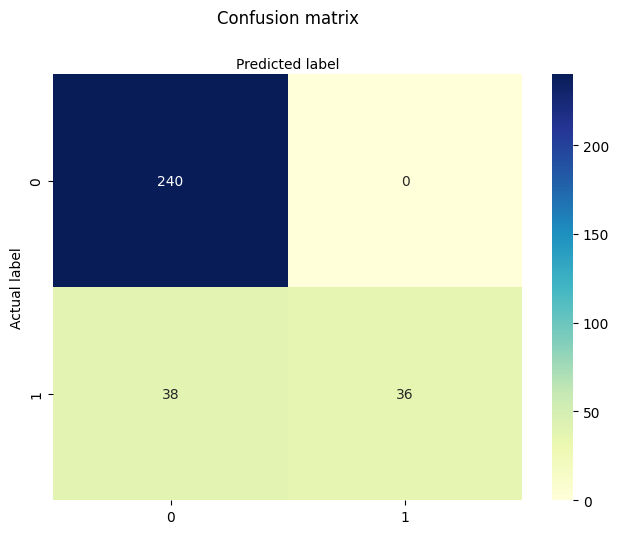

In [233]:
class_names=[0,1] # name  of classes 

fig, ax = plt.subplots() 

tick_marks = np.arange(len(class_names)) 

plt.xticks(tick_marks, class_names) 

plt.yticks(tick_marks, class_names) 

# create heatmap 

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 

ax.xaxis.set_label_position("top") 

plt.tight_layout() 

plt.title('Confusion matrix', y=1.1) 

plt.ylabel('Actual label') 

plt.xlabel('Predicted label')

In [234]:
sensitivity = cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0])
specificity = cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])
print(sensitivity, specificity)

0.4864864864864865 1.0
